# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "data/train.p"
validation_file= "data/valid.p"
testing_file = "data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = len(X_train) 

# TODO: Number of validation examples
n_validation = len(X_valid) 

# TODO: Number of testing examples.
n_test = len(X_test) 

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape
height, width, channel = image_shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))


print("Size of:")
print("- Training Set:\t\t{} samples".format(n_train))
print("- Validation Set:\t{} samples".format(n_validation))
print("- Test Set:\t\t{} samples".format(n_test))
print("Image Shape:\t\t{}".format(image_shape))
print("Number of classes:\t", n_classes)

Size of:
- Training Set:		34799 samples
- Validation Set:	4410 samples
- Test Set:		12630 samples
Image Shape:		(32, 32, 3)
Number of classes:	 43


#### Helper functions

In [78]:
import matplotlib.pyplot as plt
import csv
import random

%matplotlib inline

def print_some_images(images_list, labels_list = np.array([]), pred_list = np.array([]), number_shown = 5):
    number_shown = min(len(images_list), number_shown)
    number_per_lign = 5
    number_of_ligns = (number_shown-1)//number_per_lign + 1
    fig, axs = plt.subplots(number_of_ligns, number_per_lign, figsize=(15, 3*number_of_ligns))
    for i in range(number_shown):
        image = images_list[i].squeeze()
        if number_of_ligns == 1:
            axs[i].axis('off')
            axs[i].imshow(image, cmap='gray')
        else:
            axs[i//number_per_lign][i%number_per_lign].axis('off')
            axs[i//number_per_lign][i%number_per_lign].imshow(image, cmap='gray')
        title = ""
        if labels_list.any():
            title += "True : " + str(signnames[labels_list[i]])
        if labels_list.any() and pred_list.any():
            title += "\n"
        if pred_list.any():
            title += "Pred : " + str(signnames[pred_list[i]])
        if labels_list.any() or pred_list.any():
            if number_of_ligns == 1:
                axs[i].set_title(title)
            else:
                axs[i//number_per_lign][i%number_per_lign].set_title(title)
    plt.tight_layout()
        
def print_sample_images(images_list, labels_list = [], pred_list = []):
    num_of_samples=[]
    plt.figure(figsize=(15, 15))
    plt.suptitle("Sample images corresponding to each of the labels")
    for i in range(n_classes):
        plt.subplot(11, 4, i+1)
        images_selected = images_list[labels_list == i]
        plt.imshow(images_selected[0, :, :, :]) #draw the first image of each class
        plt.title(signnames[i])
        plt.axis('off')
        num_of_samples.append(len(images_selected))
    
    plt.show()
    
'''
# Display 5 random images
def print_sample_images(images_list, labels_list = [], pred_list = []):
    fig, axs = plt.subplots(1,5, figsize=(15, 4))
    plt.suptitle("5 random images")
    for i in range(5):
        index = random.randint(0, n_train)
        image = X_train[index]
        axs[i].axis('off')
        axs[i].imshow(image, interpolation='none')
        axs[i].set_title(signnames[y_train[index]])
'''   
# Read labels in csv file
# https://docs.python.org/2/library/csv.html
signnames = []
with open('signnames.csv', 'r') as signnames_file: 
    signnamescsv = csv.reader(signnames_file, delimiter=',')
    next(signnamescsv)
    for row in signnamescsv:
        signnames.append(row[1])
        
# From https://github.com/alexanderkuk/log-progress, slightly modified
def log_progress(sequence, every=None, size=None, name='Items'):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = int(size / 200)     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{name}: {index} / ?'.format(
                        name=name,
                        index=index
                    )
                else:
                    progress.value = index
                    label.value = u'{name}: {index} / {size}'.format(
                        name=name,
                        index=index,
                        size=size
                    )
            yield index-1, record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = "{name}: {index}".format(
            name=name,
            index=str(index or '?')
        )

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

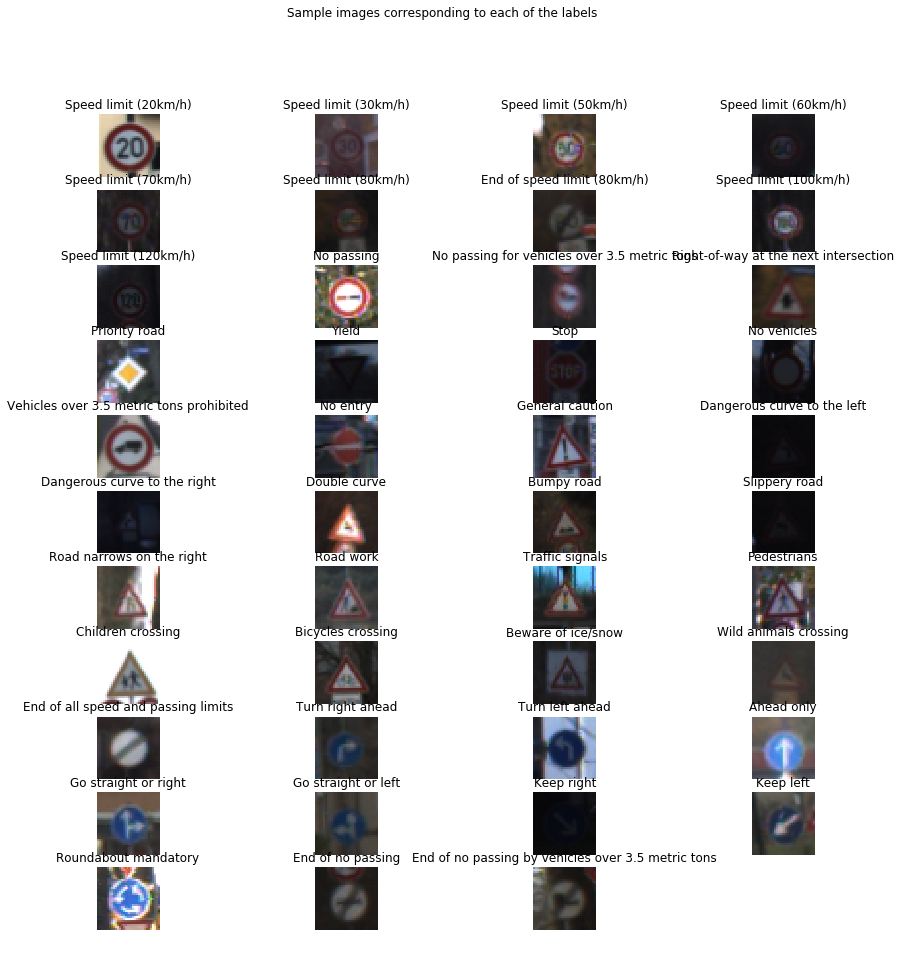

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

# Visualizations will be shown in the notebook.
     
print_sample_images(X_train, y_train)

#### Print mean image and 10 examples of each class

Class 0: Speed limit (20km/h)
180 samples


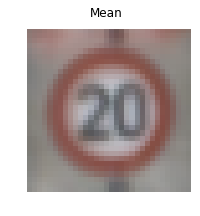

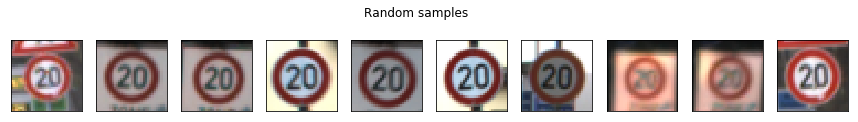

*********************************************************************

Class 1: Speed limit (30km/h)
1980 samples


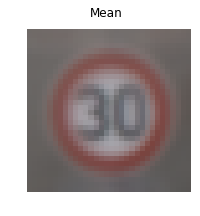

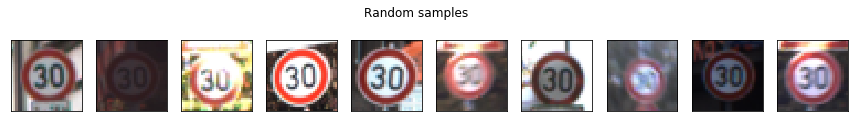

*********************************************************************

Class 2: Speed limit (50km/h)
2010 samples


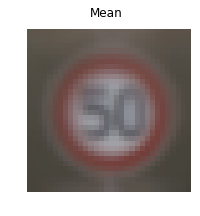

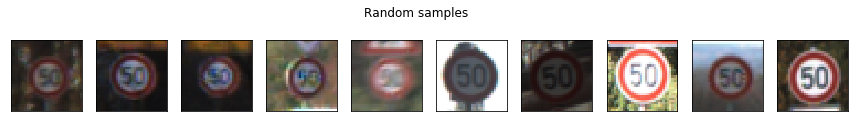

*********************************************************************

Class 3: Speed limit (60km/h)
1260 samples


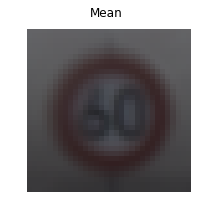

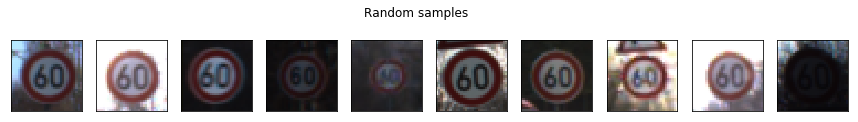

*********************************************************************

Class 4: Speed limit (70km/h)
1770 samples


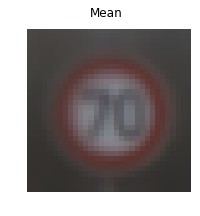

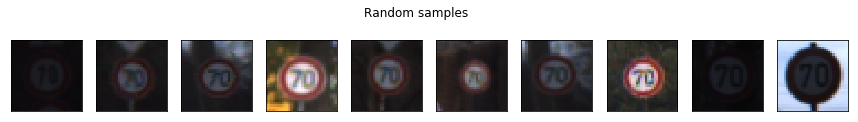

*********************************************************************

Class 5: Speed limit (80km/h)
1650 samples


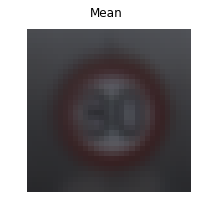

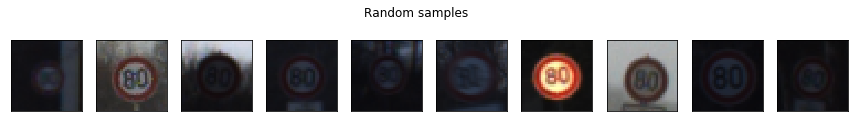

*********************************************************************

Class 6: End of speed limit (80km/h)
360 samples


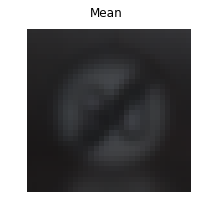

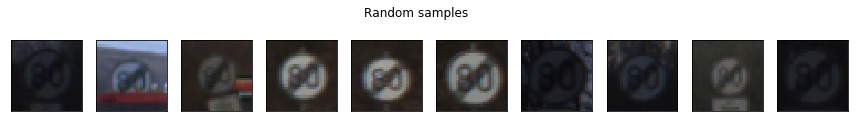

*********************************************************************

Class 7: Speed limit (100km/h)
1290 samples


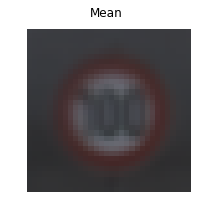

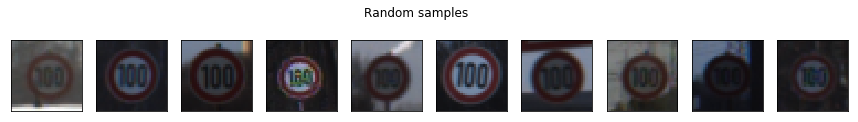

*********************************************************************

Class 8: Speed limit (120km/h)
1260 samples


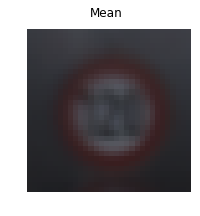

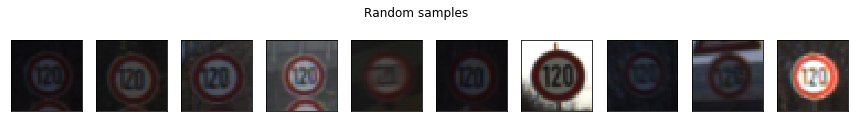

*********************************************************************

Class 9: No passing
1320 samples


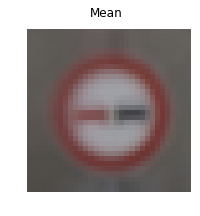

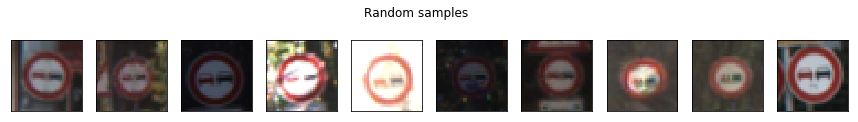

*********************************************************************

Class 10: No passing for vehicles over 3.5 metric tons
1800 samples


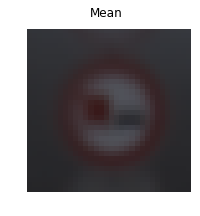

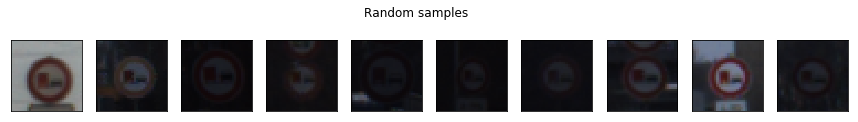

*********************************************************************

Class 11: Right-of-way at the next intersection
1170 samples


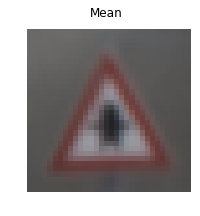

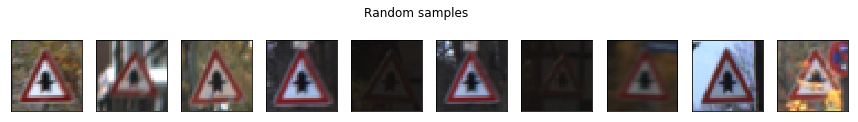

*********************************************************************

Class 12: Priority road
1890 samples


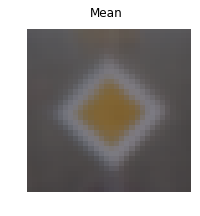

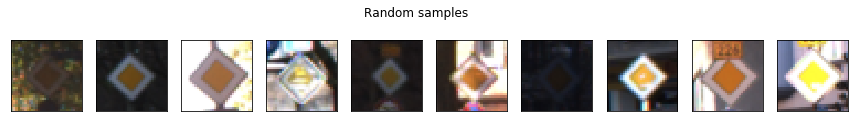

*********************************************************************

Class 13: Yield
1920 samples


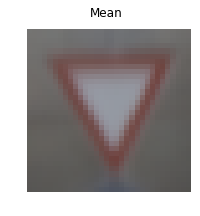

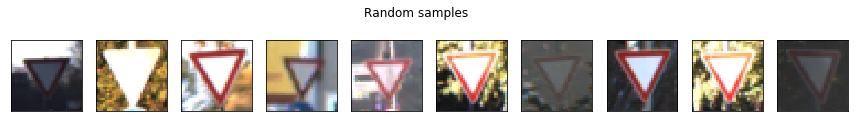

*********************************************************************

Class 14: Stop
690 samples


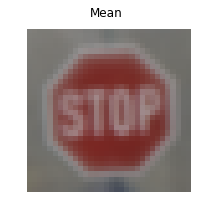

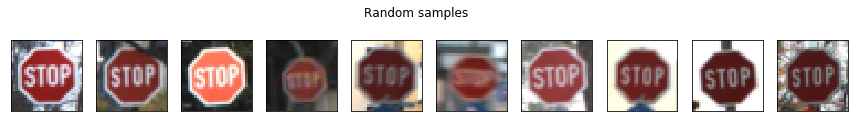

*********************************************************************

Class 15: No vehicles
540 samples


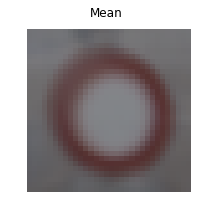

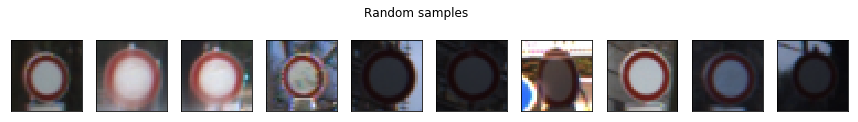

*********************************************************************

Class 16: Vehicles over 3.5 metric tons prohibited
360 samples


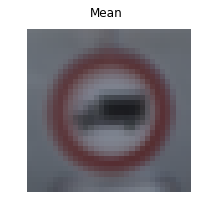

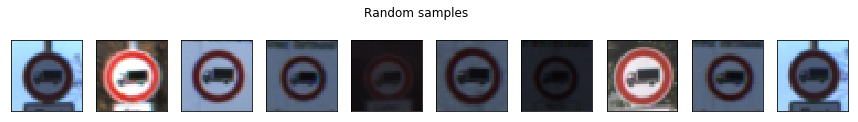

*********************************************************************

Class 17: No entry
990 samples


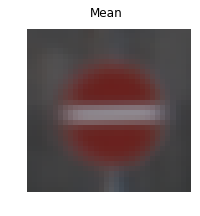

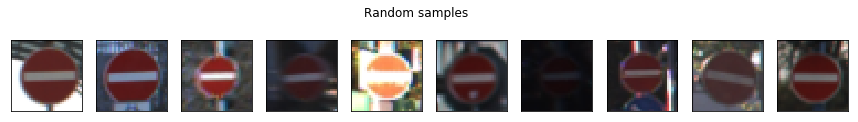

*********************************************************************

Class 18: General caution
1080 samples


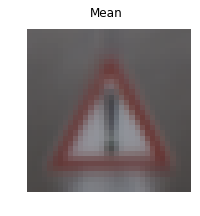

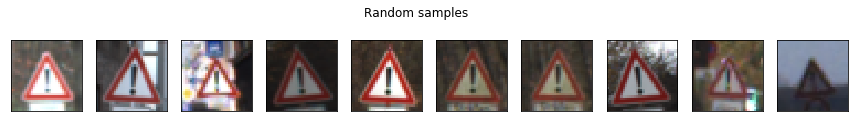

*********************************************************************

Class 19: Dangerous curve to the left
180 samples


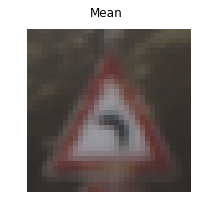

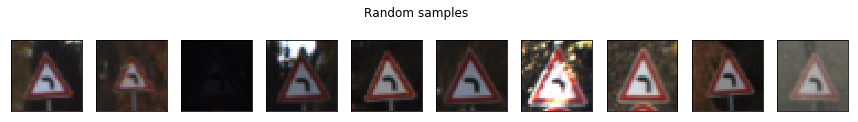

*********************************************************************

Class 20: Dangerous curve to the right
300 samples


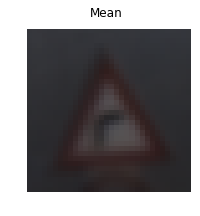

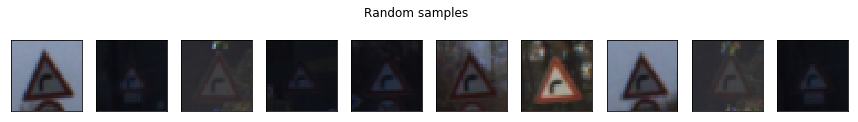

*********************************************************************

Class 21: Double curve
270 samples


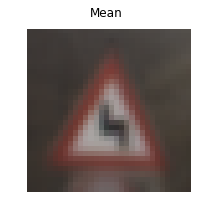

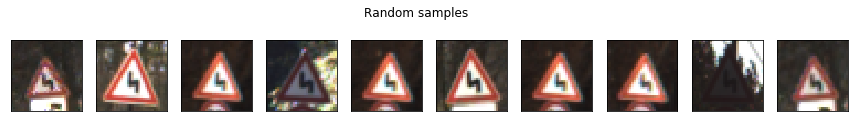

*********************************************************************

Class 22: Bumpy road
330 samples


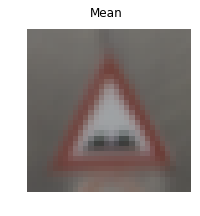

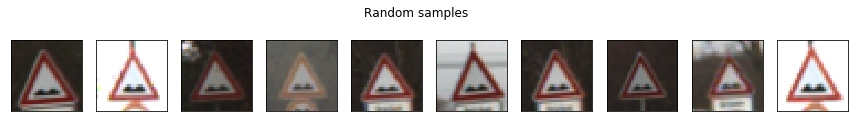

*********************************************************************

Class 23: Slippery road
450 samples


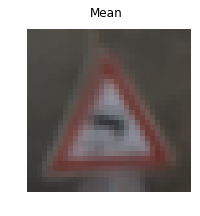

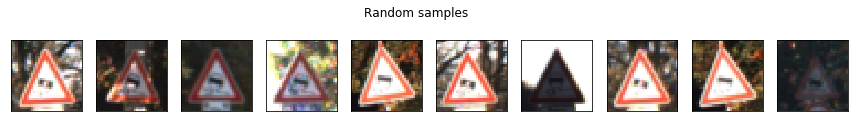

*********************************************************************

Class 24: Road narrows on the right
240 samples


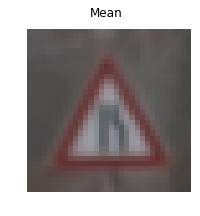

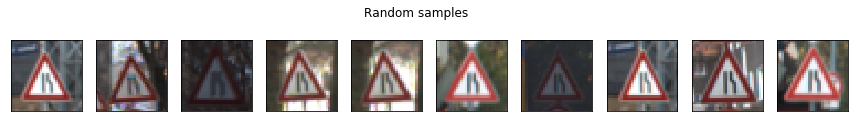

*********************************************************************

Class 25: Road work
1350 samples


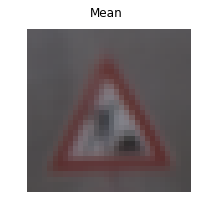

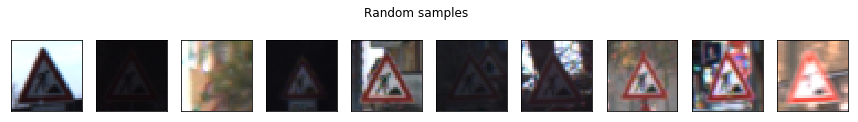

*********************************************************************

Class 26: Traffic signals
540 samples


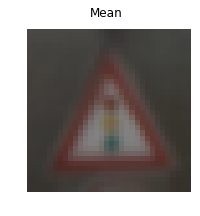

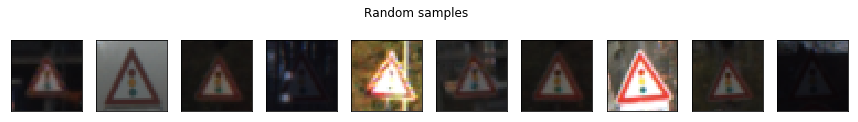

*********************************************************************

Class 27: Pedestrians
210 samples


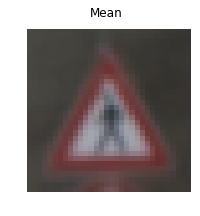

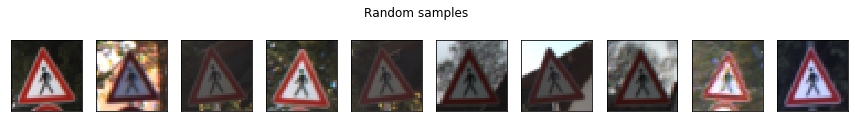

*********************************************************************

Class 28: Children crossing
480 samples


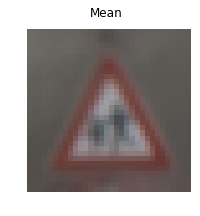

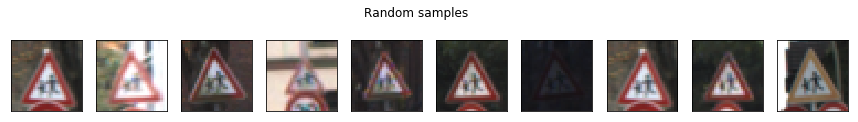

*********************************************************************

Class 29: Bicycles crossing
240 samples


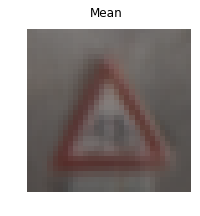

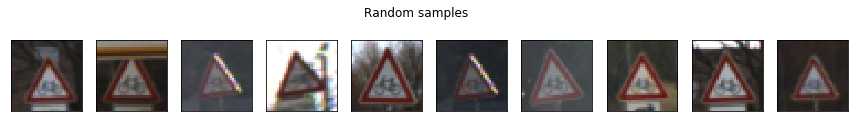

*********************************************************************

Class 30: Beware of ice/snow
390 samples


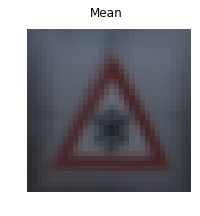

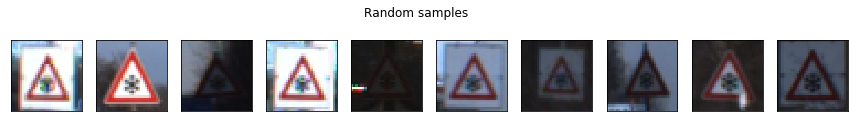

*********************************************************************

Class 31: Wild animals crossing
690 samples


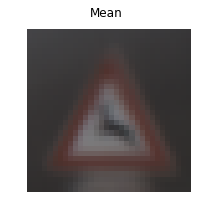

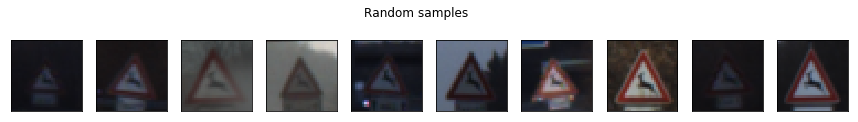

*********************************************************************

Class 32: End of all speed and passing limits
210 samples


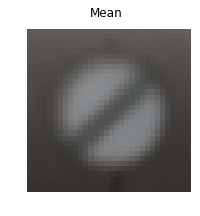

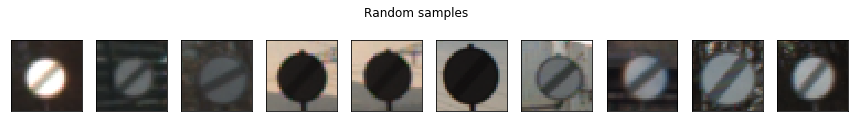

*********************************************************************

Class 33: Turn right ahead
599 samples


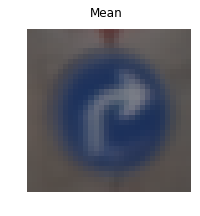

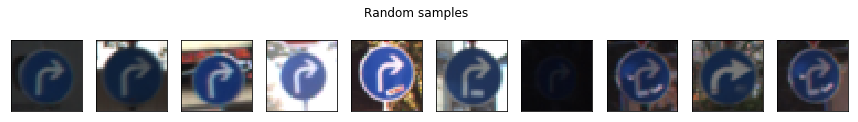

*********************************************************************

Class 34: Turn left ahead
360 samples


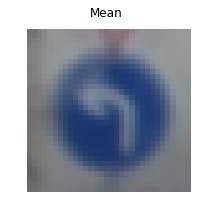

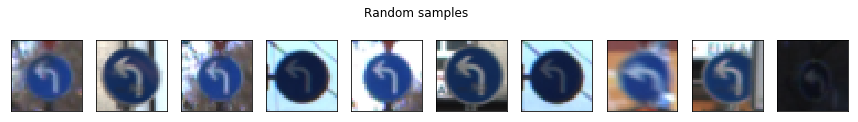

*********************************************************************

Class 35: Ahead only
1080 samples


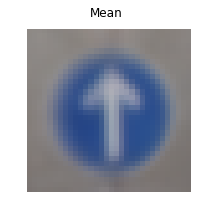

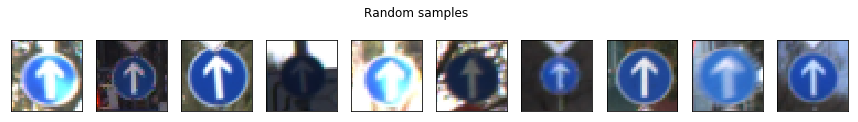

*********************************************************************

Class 36: Go straight or right
330 samples


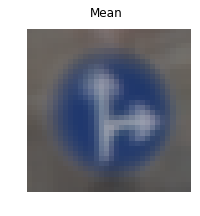

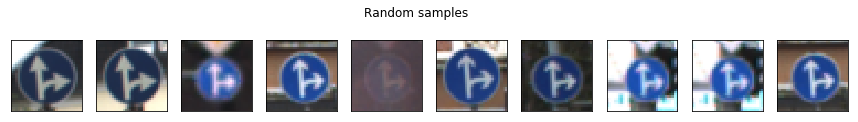

*********************************************************************

Class 37: Go straight or left
180 samples


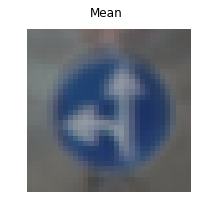

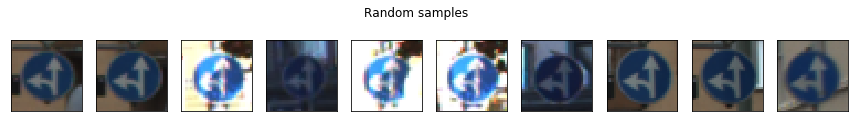

*********************************************************************

Class 38: Keep right
1860 samples


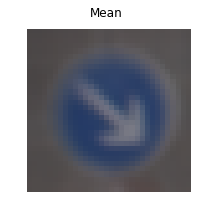

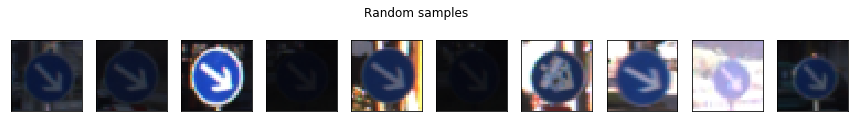

*********************************************************************

Class 39: Keep left
270 samples


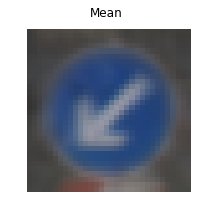

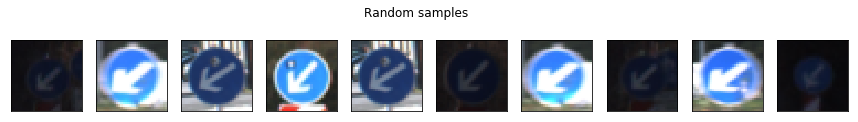

*********************************************************************

Class 40: Roundabout mandatory
300 samples


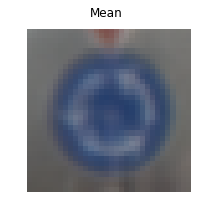

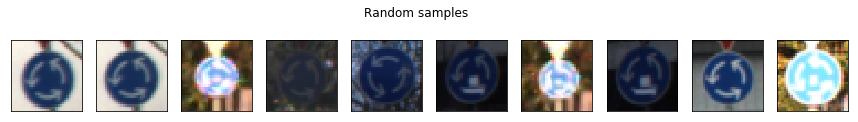

*********************************************************************

Class 41: End of no passing
210 samples


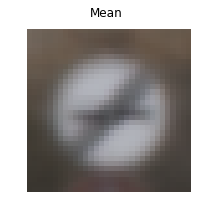

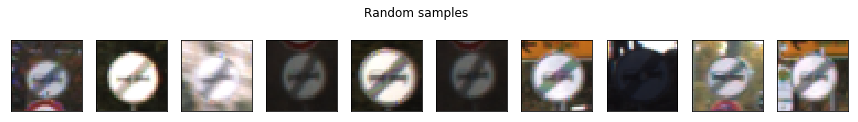

*********************************************************************

Class 42: End of no passing by vehicles over 3.5 metric tons
210 samples


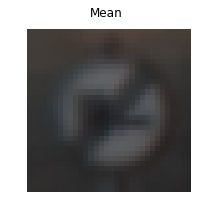

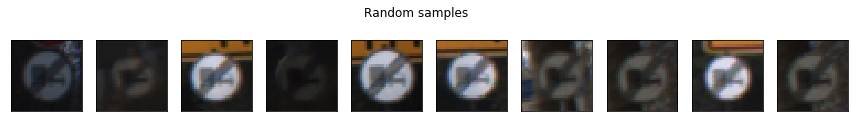

*********************************************************************



In [5]:
import random

num_samples = 10

for c in range(n_classes):
    #label_image = get_label_image(c)
    #insert_subimage(results_image, label_image, c*height, 0)
    idx = list(np.where(y_train == c)[0])
    c_count=len(idx)
    print("Class %i: %s" % (c, signnames[c]))
    print("%s samples" % str(c_count))
    mean_image = np.average(X_train[idx], axis=0)
    plt.figure(figsize=(3, 3))
    plt.suptitle("Mean")
    plt.imshow(mean_image.astype(np.uint8), interpolation='none')
    plt.axis('off')
    plt.show()
    
    fig = plt.figure(figsize = (15, 2))
    fig.suptitle("Random samples")
    for i in range(num_samples):
        sample_image = X_train[np.random.choice(idx)]
        ax = fig.add_subplot(1, num_samples, i + 1, xticks=[], yticks=[])
        ax.imshow(sample_image, interpolation='none')
    plt.show()
    
    print("*********************************************************************\n")

#### Distribution

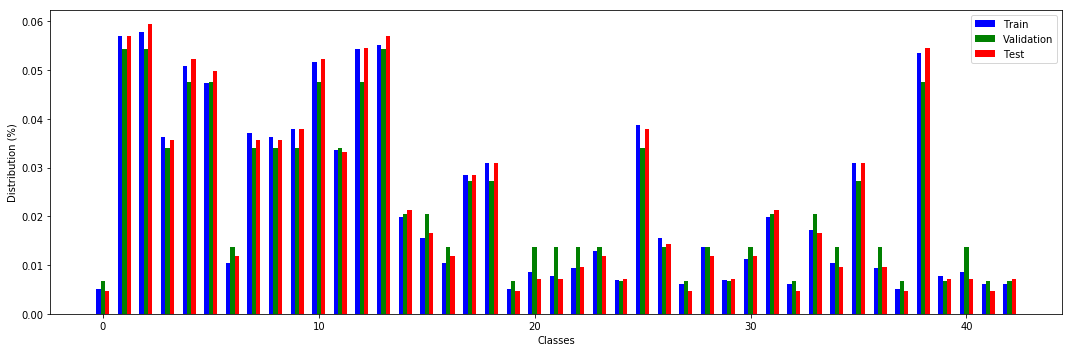

The distribution of the classes is equivalent in the different sets
[ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920  690
  540  360  990 1080  180  300  270  330  450  240 1350  540  210  480  240
  390  690  210  599  360 1080  330  180 1860  270  300  210  210]
Minimum number of samples for any label in the train set : 180
Maximum number of samples for any label in the train set : 2010


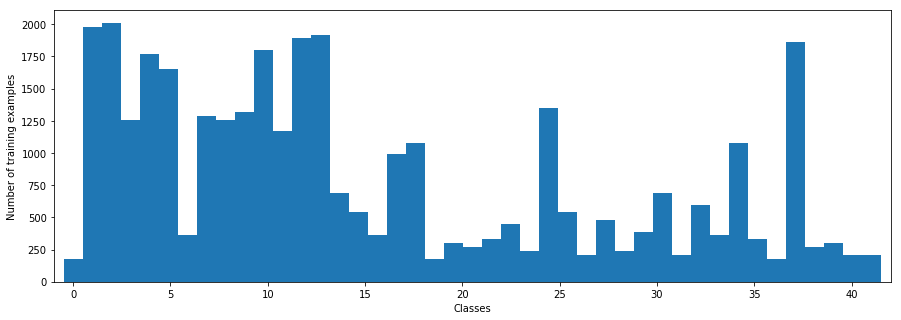

In [6]:
# Show class distribution of different sets in bar chart
fig, ax = plt.subplots(figsize=(15,5))#plt.figure(figsize=(15,5))
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique-0.2, counts/n_train, width=0.2, color='b',align='center', label='Train')
unique, counts = np.unique(y_valid, return_counts=True)
plt.bar(unique, counts/n_validation, width=0.2, color='g',align='center', label='Validation')
unique, counts = np.unique(y_test, return_counts=True)
plt.bar(unique+0.2, counts/n_test, width=0.2, color='r',align='center', label='Test')
ax.legend(loc='upper right')
ax.set_xlabel('Classes')
ax.set_ylabel('Distribution (%)')
plt.tight_layout()
plt.show()
print('The distribution of the classes is equivalent in the different sets')
print(np.bincount(y_train))
min_classes = min(np.bincount(y_train))
max_classes = max(np.bincount(y_train))
print("Minimum number of samples for any label in the train set :", min_classes)
print("Maximum number of samples for any label in the train set :", max_classes)

# Making a histogram for the distribution
plt.subplots(figsize=(15,5))
plt.xlim([-1, n_classes-1])
plt.xlabel('Classes')
plt.ylabel('Number of training examples')
plt.hist(y_train, bins = n_classes, align='left')
plt.show()

# Using plt_bar instead
'''
sign_classes, class_indices, class_counts = np.unique(y_train, return_index = True, return_counts = True)
plt.bar( np.arange( 43 ), class_counts, align='center' )
plt.xlabel('Classes')
plt.ylabel('Number of training examples')
plt.xlim([-1, 43])
plt.show()
''';

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

#### Transformations

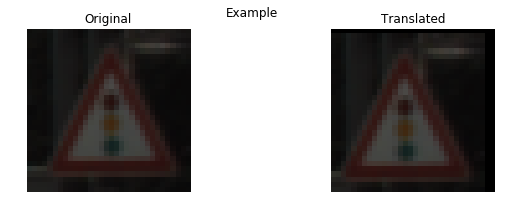

shape in/out: (32, 32, 3) (32, 32, 3)


In [7]:
# See https://docs.opencv.org/3.3.0/da/d6e/tutorial_py_geometric_transformations.html

import cv2

test_img_idx = 1349

def random_translate(img, trans_range = 2):
    rows, cols, _ = img.shape
    tr_x, tr_y = np.random.randint(-trans_range, trans_range, 2)
    Trans_M = np.float32([[1, 0, tr_x], [0, 1, tr_y]])
    img = cv2.warpAffine(img, Trans_M, (cols,rows))
    return img

test_img = X_train[test_img_idx]
test_dst = random_translate(test_img)

fig, axs = plt.subplots(1,2, figsize=(10, 3))
fig.suptitle("Example")

axs[0].axis('off')
axs[0].imshow(test_img.squeeze())
axs[0].set_title('Original')

axs[1].axis('off')
axs[1].imshow(test_dst.squeeze(), cmap='gray')
axs[1].set_title('Translated')

plt.show()

print('shape in/out:', test_img.shape, test_dst.shape)

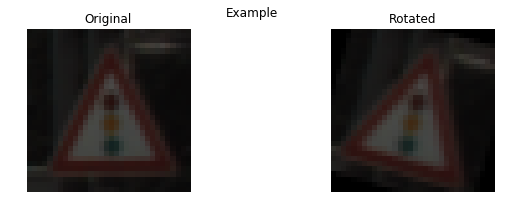

Shape in/out: (32, 32, 3) (32, 32, 3)


In [8]:
def random_rotate(img, ang_range = 20):
    rows, cols, _ = img.shape
    ang_rot = np.random.randint(-ang_range, ang_range)
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2), ang_rot, 1)
    img = cv2.warpAffine(img, Rot_M, (cols,rows))
    return img

test_img = X_train[test_img_idx]
test_dst = random_rotate(test_img)

fig, axs = plt.subplots(1,2, figsize=(10, 3))
fig.suptitle("Example")

axs[0].axis('off')
axs[0].imshow(test_img.squeeze(), cmap='gray')
axs[0].set_title('Original')

axs[1].axis('off')
axs[1].imshow(test_dst.squeeze(), cmap='gray')
axs[1].set_title('Rotated')

plt.show()

print('Shape in/out:', test_img.shape, test_dst.shape)

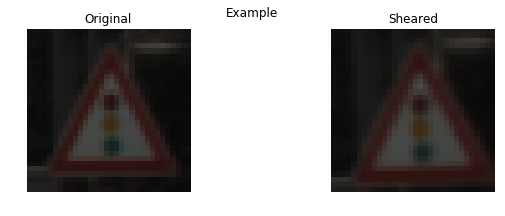

Shape in/out: (32, 32, 3) (32, 32, 3)


In [9]:
def random_shear(img, shear_range = 5):
    rows, cols, _ = img.shape
    pts1 = np.float32([[5,5],[20,5],[5,20]])
    pt1 = 5+shear_range*np.random.uniform() - shear_range/2
    pt2 = 20+shear_range*np.random.uniform() - shear_range/2
    pts2 = np.float32([[pt1,5], [pt2,pt1], [5,pt2]])
    shear_M = cv2.getAffineTransform(pts1,pts2)
    img = cv2.warpAffine(img, shear_M, (cols,rows))
    return img
    

test_img = X_train[test_img_idx]
test_dst = random_shear(test_img)

fig, axs = plt.subplots(1,2, figsize=(10, 3))
fig.suptitle("Example")

axs[0].axis('off')
axs[0].imshow(test_img.squeeze(), cmap='gray')
axs[0].set_title('Original')

axs[1].axis('off')
axs[1].imshow(test_dst.squeeze(), cmap='gray')
axs[1].set_title('Sheared')

plt.show()

print('Shape in/out:', test_img.shape, test_dst.shape)

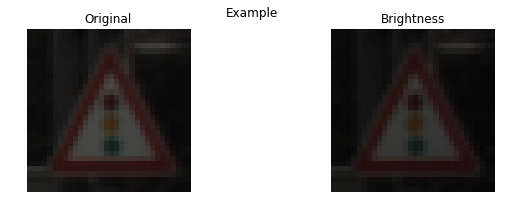

Shape in/out: (32, 32, 3) (32, 32, 3)


In [10]:
def random_brightness(img, brightness_factor_range = 0.5):
    # for images between 0 and 255
    rows, cols, ch = img.shape
    if (ch == 3):
        img = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
        img = np.array(img, dtype = np.float64)
        random_bright = np.random.uniform(1-brightness_factor_range, 1+brightness_factor_range)
        img[:,:,2] = img[:,:,2]*random_bright
        img[:,:,2][img[:,:,2]>255] = 255
        img = np.array(img, dtype = np.uint8)
        img = cv2.cvtColor(img,cv2.COLOR_HSV2RGB)
    elif (ch == 1):
        img = np.array(img, dtype = np.float64)
        random_bright = np.random.uniform(1-brightness_factor_range, 1+brightness_factor_range)
        img[:,:] = img[:,:]*random_bright
        img[:,:][img[:,:]>255] = 255
        img = np.array(img, dtype = np.uint8)
    return img

test_img = X_train[test_img_idx]
test_dst = random_brightness(test_img)

fig, axs = plt.subplots(1,2, figsize=(10, 3))
fig.suptitle("Example")

axs[0].axis('off')
axs[0].imshow(test_img.squeeze(), cmap='gray')
axs[0].set_title('Original')

axs[1].axis('off')
axs[1].imshow(test_dst.squeeze(), cmap='gray')
axs[1].set_title('Brightness')

plt.show()

print('Shape in/out:', test_img.shape, test_dst.shape)

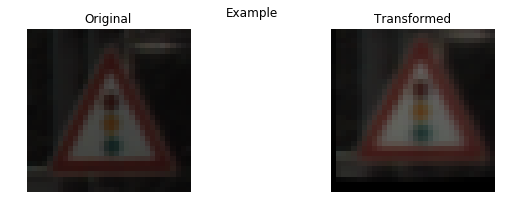

Shape in/out: (32, 32, 3) (32, 32, 3)


In [11]:
# Modified from https://medium.com/@vivek.yadav/improved-performance-of-deep-learning-neural-network-models-on-traffic-sign-classification-using-6355346da2dc
# could also be done this way with skimage : https://gist.github.com/mlgruby/b7786492ac8674747d1301aba9e2f2c2
# BETTER, doing it at training time with tf : https://medium.com/@tifa2up/image-classification-using-deep-neural-networks-a-beginner-friendly-approach-using-tensorflow-94b0a090ccd4

def transform_image(img, ang_range = 20, trans_range = 2, shear_range = 5, brightness_factor_range = 0.5):
    img = random_rotate(img, ang_range)
    img = random_translate(img, trans_range)
    img = random_shear(img, shear_range)
    img = random_brightness(img, brightness_factor_range)    
    
    return img

test_img = X_train[test_img_idx]
test_dst = transform_image(test_img)

fig, axs = plt.subplots(1,2, figsize=(10, 3))
fig.suptitle("Example")

axs[0].axis('off')
axs[0].imshow(test_img.squeeze(), cmap='gray')
axs[0].set_title('Original')

axs[1].axis('off')
axs[1].imshow(test_dst.squeeze(), cmap='gray')
axs[1].set_title('Transformed')

plt.show()

print('Shape in/out:', test_img.shape, test_dst.shape)

#### Balance and shuffle

Original number of samples : 34799
Balanced number of samples : 86430
Train data balanced
Train data shuffled


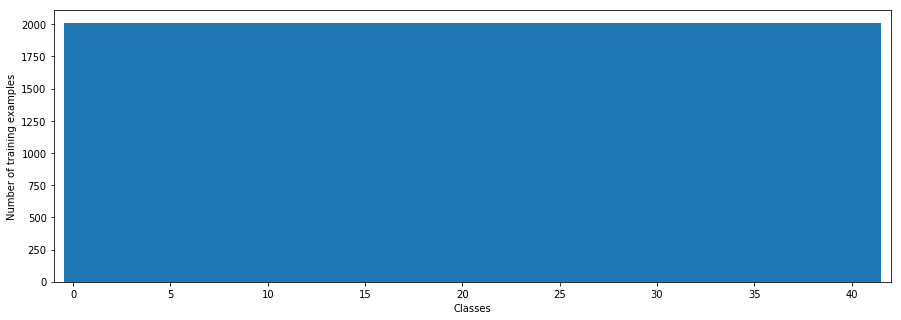

In [12]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

# Shuffle the training data.
from sklearn.utils import shuffle

already_balanced = False

# balance and augment the data such that each class has equal number of samples for training
def balance_and_augment(X_data, y_data, n_classes, num_per_class = None, augment = False):
    if num_per_class is None:
        num_per_class = max(np.bincount(y_data))
        
    bincount = np.bincount(y_data)

    sup_index = []
    for c in range(n_classes):
        idx = list(np.where(y_data == c)[0])
        sup_index = sup_index + list(np.random.choice(idx, max(0, num_per_class - bincount[c])))
    
    sup_X_data = X_data[sup_index]
    sup_y_data = y_data[sup_index]
    
    if augment:
        for idx, img in log_progress(sup_X_data, every=1000, name='Transformed images'):
            sup_X_data[idx] = transform_image(img)
        
    balanced_X_data = np.concatenate((X_data, sup_X_data), axis=0)
    balanced_y_data = np.concatenate((y_data, sup_y_data), axis=0)

    print("Original number of samples : " + str(len(X_data)))
    print("Balanced number of samples : " + str(len(balanced_X_data)))
    
    return balanced_X_data, balanced_y_data


if not already_balanced:
    # balance the training data
    X_train, y_train = balance_and_augment(X_train, y_train, n_classes, augment = True) # num_per_class = int(max_classes * 1.5)
    print("Train data balanced")
    
    # shuffle the training data
    X_train, y_train = shuffle(X_train, y_train)
    print("Train data shuffled")
    
    already_balanced = True

# Making a histogram for the distribution
plt.subplots(figsize=(15,5))
plt.xlim([-1, n_classes-1])
plt.xlabel('Classes')
plt.ylabel('Number of training examples')
plt.hist(y_train, bins = n_classes, align='left')
plt.show()

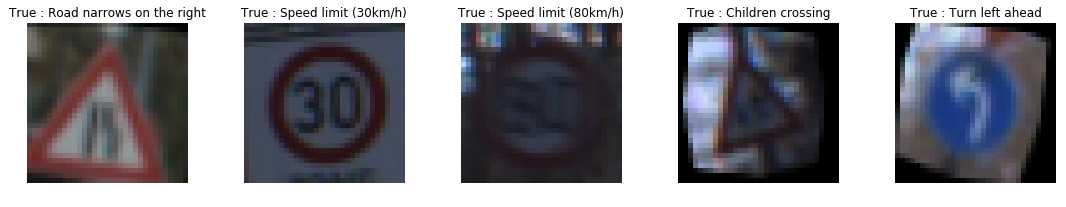

In [13]:
print_some_images(X_train, labels_list = y_train)

#### Convert to grayscale

In [ ]:
'''
# grayscale
# https://stackoverflow.com/questions/12201577/how-can-i-convert-an-rgb-image-into-grayscale-in-python
def rgb2gray(rgb):
    #gray = 0.299 * r + 0.587 * g + 0.114 * b
    #r, g, b = rgb[:,:,:,0], rgb[:,:,:,1], rgb[:,:,:,2]
    rgb2gray_weights = [0.299, 0.587, 0.114]
    gray = np.dot(rgb[...,:3], rgb2gray_weights)
    gray = gray.reshape(gray.shape + (1,))
    return gray

#gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
X_train_gray = rgb2gray(X_train)
X_valid_gray = rgb2gray(X_valid)
X_test_gray = rgb2gray(X_test)

print('RGB shape of X_train:', X_train.shape)
print('Grayscale shape of X_train:', X_train_gray.shape)
    
print_some_images(X_train, labels_list = y_train)
print_some_images(X_train_gray, labels_list = y_train)
'''

#### Normalize

In [ ]:
### DON'T NEED TO RUN
'''
# Normalized color images
X_train_norm = (X_train - 128.) / 128.

print_sample_images(X_train, y_train)

print_some_images(X_train, labels_list = y_train)
print_some_images(X_train_norm, labels_list = y_train)
'''

In [ ]:
'''
ref_mean = 0
ref_std = 0

def set_mean_and_std(reference):
    global ref_mean, ref_std
    ref_mean = np.mean(reference, axis = (0, 1, 2))
    ref_std = np.std(reference, axis = (0, 1, 2))
    
# call set_mean_and_std beforehand
# features = features to normalize
def normalize(img):
    global ref_mean, ref_std
    norm_img = img
    norm_img -= ref_mean #128 # zero-center
    norm_img /= ref_std #128 # normalize
    return norm_img

set_mean_and_std(X_train_gray)

X_train_gray_norm = normalize(X_train_gray)
X_valid_gray_norm = normalize(X_valid_gray)
X_test_gray_norm = normalize(X_test_gray)
   
print_some_images(X_train_gray, labels_list = y_train)
print_some_images(X_train_gray_norm, labels_list = y_train)

#print(np.mean(X_train_gray_norm))
#print(np.std(X_train_gray_norm))
#print(np.min(X_train_gray_norm))
#print(np.max(X_train_gray_norm))
'''

#### Pre-processing

In [14]:
from skimage import exposure
import cv2
import numpy as np
import warnings 

def pre_processing_single_img (img, contrast = False):
    # Gray image
    img_gray = cv2.cvtColor(img, (cv2.COLOR_BGR2YUV)) # gray image
    img_y = img_gray[:,:,0] # Y channel
    
    # Normalize
    img_y = (img_y / 255.).astype(np.float32) # between 0-1
    img_y = img_y - 0.5 # between -0.5 - 0.5
    
    # Adjust contrast
    # Really slow
    # TODO : bad result, to investigate
    if contrast:
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            #img_y = exposure.equalize_hist(img_y)
            img_y = exposure.equalize_adapthist(img_y) # Contrast Limited Adaptive Histogram Equalization

    # Reshape
    img_y = img_y.reshape(img_y.shape + (1,))
    return img_y

def pre_processing(X):
    X_out = np.empty((X.shape[0],X.shape[1],X.shape[2],1)).astype(np.float32) 
    for idx, img in log_progress(X, every=1000, name='Pre-processed images'): #for idx, img in enumerate(X):
        X_out[idx] = pre_processing_single_img(img, False)
    return X_out

In [15]:
# preprocessing training, validation and test set
X_train = pre_processing(X_train)
X_valid = pre_processing(X_valid)
X_test = pre_processing(X_test)

print(X_train.shape)

(86430, 32, 32, 1)


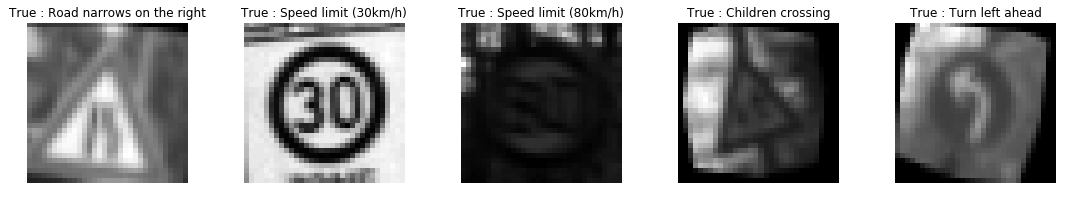

In [16]:
print_some_images(X_train, labels_list = y_train)

### Data

#### Save augmented data

In [17]:
# DON'T RUN !!!
# Save data

data = {"features":X_train, "labels":y_train}
#training_file_aug_path = "data/train_aug.p"
training_file_p_path = "data/train_balanced_preprocessed.p"
with open(training_file_p_path, 'wb') as file:
    pickle.dump(data, file, protocol=pickle.HIGHEST_PROTOCOL)

data = {"features":X_valid, "labels":y_valid}
#training_file_aug_path = "data/train_aug.p"
valid_file_p_path = "data/valid_balanced_preprocessed.p"
with open(valid_file_p_path, 'wb') as file:
    pickle.dump(data, file, protocol=pickle.HIGHEST_PROTOCOL)
    
data = {"features":X_test, "labels":y_test}
test_file_p_path = "data/test_balanced_preprocessed.p"
with open(test_file_p_path, 'wb') as file:
    pickle.dump(data, file, protocol=pickle.HIGHEST_PROTOCOL)

#### Load augmented data

In [38]:
import pickle

training_file = "data/train_balanced_preprocessed.p"
validation_file= "data/valid_balanced_preprocessed.p"
testing_file = "data/test_balanced_preprocessed.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid= valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print(X_train.shape)
print(y_train.shape)

(86430, 32, 32, 1)
(86430,)


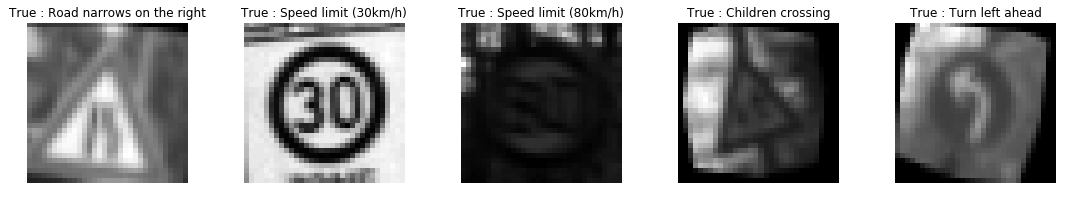

In [39]:
print_some_images(X_train, labels_list = y_train)

### Model Architecture

In [ ]:
# Not used
'''
### Define your architecture here.
### Feel free to use as many code cells as needed.

from tensorflow.contrib.layers import flatten

number_of_channels = 1

def LeNetMod(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    # If not using grayscale, the third number in shape would be 3 for rgb
    #conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    #conv1_b = tf.Variable(tf.zeros(6))
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, number_of_channels, 16), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(16))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # dropout
    #conv1 = tf.nn.dropout(conv1,keep_prob)

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    #conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    #conv2_b = tf.Variable(tf.zeros(16))
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 32), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(32))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # dropout
    #conv2 = tf.nn.dropout(conv2,keep_prob)
    
    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    # SOLUTION: Flatten. Input = 5x5x24. Output = 600.
    # SOLUTION: Flatten. Input = 5x5x32. Output = 800.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    #fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    #fc1_b = tf.Variable(tf.zeros(120))
    fc1_W = tf.Variable(tf.truncated_normal(shape=(800, 400), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(400))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    
    # dropout
    fc1 = tf.nn.dropout(fc1,keep_prob)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    #fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    #fc2_b  = tf.Variable(tf.zeros(84))
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(400, 200), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(200))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
    # dropout
    fc2 = tf.nn.dropout(fc2,keep_prob)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = n_classes.
    #fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(200, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits
'''

### Sermanet architecture
Adapted from Sermanet/LeCunn traffic sign classification journal article
http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf

In [40]:
from tensorflow.contrib.layers import flatten

'''
# With SAME padding
def Sermanet(x, weights, biases):        
    # Layer 1: Convolutional. Input = 32x32xchannel. Output = 32x32x12.
    conv1   = tf.nn.conv2d(x, weights[0], strides=[1, 1, 1, 1], padding='SAME') + biases[0]
    conv1 = tf.nn.relu(conv1)
    # Pooling. Input = 32x32x12. Output = 16x16x12.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

    # Layer 2: Convolutional. Output = 16x16x24.
    conv2   = tf.nn.conv2d(conv1, weights[1], strides=[1, 1, 1, 1], padding='SAME') + biases[1]
    conv2 = tf.nn.relu(conv2)
    # Pooling. Input = 16x16x24. Output = 8x8x24.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')    
    
    # Concatenation
    # Pooling. Input = 16x16x12. Output = 8x8x12.
    conv1_pool = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    # 8*8*12 = 768
    conv1_flat = flatten(conv1_pool)
    # 8*8*24 = 1536
    conv2_flat = flatten(conv2)
    fc0 = tf.concat(1, [conv1_flat, conv2_flat])
    
    # Layer 3: Fully Connected. Input = 768+1536 =2304. Output = 400.
    fc1 = tf.matmul(fc0, weights[2]) + biases[2]
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1,keep_prob)

    # Layer 4: Fully Connected. Input = 400. Output = n_classes.
    logits = tf.matmul(fc1, weights[3]) + biases[3]
    
    return logits
''';

# With VALID padding
def Sermanet(x, weights, biases):        
    # Layer 1: Convolutional. Input = 32x32xchannel. Output = 28x28x12.
    conv1   = tf.nn.conv2d(x, weights[0], strides=[1, 1, 1, 1], padding='VALID') + biases[0]
    conv1 = tf.nn.relu(conv1)
    # Pooling. Input = 28x28x12. Output = 14x14x12.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x24.
    conv2   = tf.nn.conv2d(conv1, weights[1], strides=[1, 1, 1, 1], padding='VALID') + biases[1]
    conv2 = tf.nn.relu(conv2)
    # Pooling. Input = 10x10x24. Output = 5x5x24.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')    
    
    # Concatenation
    # Pooling. Input = 14x14x12. Output = 7x7x12.
    conv1_pool = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    # 7*7*12 = 588
    conv1_flat = flatten(conv1_pool)
    # 5*5*24 = 600
    conv2_flat = flatten(conv2)
    fc0 = tf.concat(1, [conv1_flat, conv2_flat])
    
    # Layer 3: Fully Connected. Input = 588+600 =1188. Output = 400.
    fc1 = tf.matmul(fc0, weights[2]) + biases[2]
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1,keep_prob)

    # Layer 4: Fully Connected. Input = 400. Output = n_classes.
    logits = tf.matmul(fc1, weights[3]) + biases[3]
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [ ]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

#### Setup TensorFlow

In [41]:
import tensorflow as tf

EPOCHS = 30
BATCH_SIZE = 128
keep_probability = 0.5
# TODO : Add learning rate decay?
rate = 0.001 #0.005 #0.001

#### Features and Labels

In [42]:
with tf.name_scope('input'):
    x = tf.placeholder(tf.float32, (None, 32, 32, 1), name="x_placeholder")
    y = tf.placeholder(tf.int32, (None), name="y_placeholder")
    y_ = tf.one_hot(y, n_classes)
    keep_prob = tf.placeholder(tf.float32, name="keep_prob_placeholder")

#### Setting data

In [43]:
X_train = X_train
X_valid = X_valid
X_test = X_test

### Weights and biases

In [44]:
number_of_channels = X_train.shape[3]
print('Number of channels : ' + str(number_of_channels))

# Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
mu = 0
sigma = 0.1

# mine
weights = [
    tf.Variable(tf.truncated_normal(shape=(5, 5, number_of_channels, 12), mean = mu, stddev = sigma)),
    tf.Variable(tf.truncated_normal(shape=(5, 5, 12, 24), mean = mu, stddev = sigma)),
    tf.Variable(tf.truncated_normal(shape=(1188, 400), mean = mu, stddev = sigma)), # 2304 for SAME
    tf.Variable(tf.truncated_normal(shape=(400, n_classes), mean = mu, stddev = sigma))
]
biases = [
   tf.Variable(tf.zeros(12)),
   tf.Variable(tf.zeros(24)),
   tf.Variable(tf.zeros(400)),
   tf.Variable(tf.zeros(n_classes))
]


'''
# new
weights = [
    tf.Variable(tf.truncated_normal(shape=(5, 5, number_of_channels, 25), mean = mu, stddev = sigma)), # 12
    tf.Variable(tf.truncated_normal(shape=(5, 5, 25, 30), mean = mu, stddev = sigma)), # 24
    # 7*7*25 + 5*5*30 = 1225 + 750 = 1975
    tf.Variable(tf.truncated_normal(shape=(1975, 400), mean = mu, stddev = sigma)), # 1188
    tf.Variable(tf.truncated_normal(shape=(400, n_classes), mean = mu, stddev = sigma))
]
biases = [
   tf.Variable(tf.zeros(25)),
   tf.Variable(tf.zeros(30)),
   tf.Variable(tf.zeros(400)),
   tf.Variable(tf.zeros(n_classes))
]
''';

'''
# original Sermanet
weights = [
    tf.Variable(tf.truncated_normal(shape=(5, 5, number_of_channels, 108), mean = mu, stddev = sigma)),
    tf.Variable(tf.truncated_normal(shape=(5, 5, 108, 108), mean = mu, stddev = sigma)),
    tf.Variable(tf.truncated_normal(shape=(1188, 400), mean = mu, stddev = sigma)),
    tf.Variable(tf.truncated_normal(shape=(400, n_classes), mean = mu, stddev = sigma))
]
biases = [
   tf.Variable(tf.zeros(12)),
   tf.Variable(tf.zeros(24)),
   tf.Variable(tf.zeros(400)),
   tf.Variable(tf.zeros(n_classes))
]
''';

Number of channels : 1


#### Training Pipeline

In [45]:
#logits = LeNetMod(x)
logits = Sermanet(x, weights, biases)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=logits)
# Original loss function
loss_operation = tf.reduce_mean(cross_entropy)

# Regularization
# http://www.ritchieng.com/machine-learning/deep-learning/tensorflow/regularization/
# beta = 0.001
#regularizer = tf.reduce_sum([tf.nn.l2_loss(w) for w in weights])
#loss_operation = tf.reduce_mean(loss_operation + beta * regularizer)

optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

#### Tensorboard

In [46]:
logs_path = "/tmp/tensorflow/"
writer = tf.train.SummaryWriter(logs_path, graph=tf.get_default_graph())

# in terminal : tensorboard --logdir=run1:/tmp/tensorflow/ --port 6006

Instructions for updating:
Please switch to tf.summary.FileWriter. The interface and behavior is the same; this is just a rename.


#### Operations

In [47]:
correct_prediction_operation = tf.equal(tf.argmax(logits, 1), tf.argmax(y_, 1)) # = true positives + true negative
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction_operation, tf.float32))
correctly_recognised_indices = tf.squeeze(tf.where(correct_prediction_operation), [1])  # indices of correctly recognised images
incorrectly_recognised_indices = tf.squeeze(tf.where(tf.logical_not(correct_prediction_operation)), [1]) # indices of incorrectly recognised images
#everything_incorrect_first = tf.concat(0, [incorrectly_recognised_indices, correctly_recognised_indices]) # images reordered with indeces of unrecognised images first
x_incorrect = tf.gather(x, incorrectly_recognised_indices)
saver = tf.train.Saver()

In [29]:
'''
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    incorrect = sess.run(x_incorrect, feed_dict={x: X_test, y: y_test, keep_prob: 1})
    print(incorrect.shape)
''';

#### Model Evaluation

In [48]:
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    #total_correct_prediction = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1})
        total_accuracy += (accuracy * len(batch_x))
        
    mean_accuracy = total_accuracy / num_examples
    return mean_accuracy

#### Train the model

In [49]:
import datetime

startTime = datetime.datetime.now()  

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: keep_probability})
        
        print("EPOCH {} ...".format(i+1))
        train_accuracy = evaluate(X_train, y_train)
        print("Train Accuracy = {:.3f}".format(train_accuracy))
        validation_accuracy = evaluate(X_valid, y_valid)
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")
    
print("Time taken for training :", datetime.datetime.now() - startTime)

Training...

EPOCH 1 ...
evaluate
Train Accuracy = 0.839
evaluate
Validation Accuracy = 0.852

EPOCH 2 ...
evaluate
Train Accuracy = 0.921
evaluate
Validation Accuracy = 0.917

EPOCH 3 ...
evaluate
Train Accuracy = 0.946
evaluate
Validation Accuracy = 0.934

EPOCH 4 ...
evaluate
Train Accuracy = 0.960
evaluate
Validation Accuracy = 0.944

EPOCH 5 ...
evaluate
Train Accuracy = 0.973
evaluate
Validation Accuracy = 0.940

EPOCH 6 ...
evaluate
Train Accuracy = 0.979
evaluate
Validation Accuracy = 0.956

EPOCH 7 ...
evaluate
Train Accuracy = 0.985
evaluate
Validation Accuracy = 0.957

EPOCH 8 ...
evaluate
Train Accuracy = 0.985
evaluate
Validation Accuracy = 0.955

EPOCH 9 ...
evaluate
Train Accuracy = 0.990
evaluate
Validation Accuracy = 0.953

EPOCH 10 ...
evaluate
Train Accuracy = 0.991
evaluate
Validation Accuracy = 0.961

EPOCH 11 ...
evaluate
Train Accuracy = 0.993
evaluate
Validation Accuracy = 0.957

EPOCH 12 ...
evaluate
Train Accuracy = 0.994
evaluate
Validation Accuracy = 0.961



Aug + VALID

Training...

EPOCH 1 ...
evaluate
Train Accuracy = 0.839
evaluate
Validation Accuracy = 0.852

EPOCH 2 ...
evaluate
Train Accuracy = 0.921
evaluate
Validation Accuracy = 0.917

EPOCH 3 ...
evaluate
Train Accuracy = 0.946
evaluate
Validation Accuracy = 0.934

EPOCH 4 ...
evaluate
Train Accuracy = 0.960
evaluate
Validation Accuracy = 0.944

EPOCH 5 ...
evaluate
Train Accuracy = 0.973
evaluate
Validation Accuracy = 0.940

EPOCH 6 ...
evaluate
Train Accuracy = 0.979
evaluate
Validation Accuracy = 0.956

EPOCH 7 ...
evaluate
Train Accuracy = 0.985
evaluate
Validation Accuracy = 0.957

EPOCH 8 ...
evaluate
Train Accuracy = 0.985
evaluate
Validation Accuracy = 0.955

EPOCH 9 ...
evaluate
Train Accuracy = 0.990
evaluate
Validation Accuracy = 0.953

EPOCH 10 ...
evaluate
Train Accuracy = 0.991
evaluate
Validation Accuracy = 0.961

EPOCH 11 ...
evaluate
Train Accuracy = 0.993
evaluate
Validation Accuracy = 0.957

EPOCH 12 ...
evaluate
Train Accuracy = 0.994
evaluate
Validation Accuracy = 0.961

EPOCH 13 ...
evaluate
Train Accuracy = 0.993
evaluate
Validation Accuracy = 0.957

EPOCH 14 ...
evaluate
Train Accuracy = 0.995
evaluate
Validation Accuracy = 0.968

EPOCH 15 ...
evaluate
Train Accuracy = 0.995
evaluate
Validation Accuracy = 0.961

EPOCH 16 ...
evaluate
Train Accuracy = 0.997
evaluate
Validation Accuracy = 0.966

EPOCH 17 ...
evaluate
Train Accuracy = 0.996
evaluate
Validation Accuracy = 0.960

EPOCH 18 ...
evaluate
Train Accuracy = 0.996
evaluate
Validation Accuracy = 0.969

EPOCH 19 ...
evaluate
Train Accuracy = 0.997
evaluate
Validation Accuracy = 0.971

EPOCH 20 ...
evaluate
Train Accuracy = 0.997
evaluate
Validation Accuracy = 0.962

EPOCH 21 ...
evaluate
Train Accuracy = 0.998
evaluate
Validation Accuracy = 0.968

EPOCH 22 ...
evaluate
Train Accuracy = 0.998
evaluate
Validation Accuracy = 0.967

EPOCH 23 ...
evaluate
Train Accuracy = 0.998
evaluate
Validation Accuracy = 0.963

EPOCH 24 ...
evaluate
Train Accuracy = 0.998
evaluate
Validation Accuracy = 0.962

EPOCH 25 ...
evaluate
Train Accuracy = 0.999
evaluate
Validation Accuracy = 0.967

EPOCH 26 ...
evaluate
Train Accuracy = 0.998
evaluate
Validation Accuracy = 0.963

EPOCH 27 ...
evaluate
Train Accuracy = 0.998
evaluate
Validation Accuracy = 0.965

EPOCH 28 ...
evaluate
Train Accuracy = 0.998
evaluate
Validation Accuracy = 0.965

EPOCH 29 ...
evaluate
Train Accuracy = 0.997
evaluate
Validation Accuracy = 0.960

EPOCH 30 ...
evaluate
Train Accuracy = 0.999
evaluate
Validation Accuracy = 0.968

Model saved
Time taken for training : 1:00:53.800192

With augm, SAME

Training...

EPOCH 1 ...
evaluate
Train Accuracy = 0.819
evaluate
Validation Accuracy = 0.847

EPOCH 2 ...
evaluate
Train Accuracy = 0.909
evaluate
Validation Accuracy = 0.912

EPOCH 3 ...
evaluate
Train Accuracy = 0.940
evaluate
Validation Accuracy = 0.921

EPOCH 4 ...
evaluate
Train Accuracy = 0.952
evaluate
Validation Accuracy = 0.930

EPOCH 5 ...
evaluate
Train Accuracy = 0.969
evaluate
Validation Accuracy = 0.949

EPOCH 6 ...
evaluate
Train Accuracy = 0.977
evaluate
Validation Accuracy = 0.946

EPOCH 7 ...
evaluate
Train Accuracy = 0.984
evaluate
Validation Accuracy = 0.946

EPOCH 8 ...
evaluate
Train Accuracy = 0.983
evaluate
Validation Accuracy = 0.937

EPOCH 9 ...
evaluate
Train Accuracy = 0.988
evaluate
Validation Accuracy = 0.945

EPOCH 10 ...
evaluate
Train Accuracy = 0.988
evaluate
Validation Accuracy = 0.948

Model saved
Time taken for training : 0:45:52.492398

#### Evaluate the model

In [50]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    train_accuracy = evaluate(X_train, y_train)
    print("Training Accuracy = {:.3f}".format(train_accuracy))
    valid_accuracy = evaluate(X_valid, y_valid)
    print("Validation Accuracy = {:.3f}".format(valid_accuracy))
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    

evaluate
Training Accuracy = 0.999
evaluate
Validation Accuracy = 0.968
evaluate
Test Accuracy = 0.948


# Precision and recall

In [53]:
from sklearn import metrics

def print_confusion_matrix(cm):
    plt.figure(figsize=(40,40))
    plt.rcParams["figure.figsize"] = (40,40)
    plt.matshow(cm, cmap=plt.get_cmap('plasma'))
    plt.colorbar()
    tick_marks = np.arange(n_classes)
    plt.xticks(tick_marks, range(n_classes))
    plt.yticks(tick_marks, range(n_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix (Numbers)')
    plt.show()
    
    plt.figure(figsize=(40,40))
    cm_precision = cm / cm.astype(np.float).sum(axis=1)
    plt.matshow(cm_precision, cmap=plt.get_cmap('plasma'))
    plt.colorbar()
    tick_marks = np.arange(n_classes)
    plt.xticks(tick_marks, range(n_classes))
    plt.yticks(tick_marks, range(n_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix (Precision)')
    plt.show()
    
    plt.figure(figsize=(40,40))
    cm_recall = cm / cm.astype(np.float).sum(axis=0)
    plt.matshow(cm_recall, cmap=plt.get_cmap('plasma'))
    plt.colorbar()
    tick_marks = np.arange(n_classes)
    plt.xticks(tick_marks, range(n_classes))
    plt.yticks(tick_marks, range(n_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix (Recall)')
    plt.show()

def print_metrics(X_data, y_data, by_class = True):
    with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))
        y_p = tf.argmax(logits, 1)
        y_pred = sess.run( y_p, feed_dict={x: X_data, y: y_data, keep_prob: 1})

    y_true = y_data
    print("Precision", metrics.precision_score(y_true, y_pred, average='macro'))
    print("Recall", metrics.recall_score(y_true, y_pred, average='macro'))
    print("f1_score", metrics.f1_score(y_true, y_pred, average='macro'))
    print("accuracy_score", metrics.accuracy_score(y_true, y_pred))
    

    if by_class:
        precision_by_class = metrics.precision_score(y_true, y_pred, average=None)
        recall_by_class = metrics.recall_score(y_true, y_pred, average=None)
        f1_by_class = metrics.f1_score(y_true, y_pred, average=None)
        print()
        print("BY CLASS")
        for i in range(n_classes):
            print(signnames[i])
            print("Precision : " + str(precision_by_class[i]) + " ; Recall : " +  str(recall_by_class[i])+ " ; f1_score : " +  str(f1_by_class[i]) )

        print()
        print("Confusion_matrix")
        cm = metrics.confusion_matrix(y_true, y_pred)
        #np.set_printoptions(threshold=np.inf) # https://stackoverflow.com/questions/1987694/print-the-full-numpy-array
        #print (cm)
        # Save the confusion matrix in a csv file:
        np.savetxt("Confusion_matrix.csv", cm, delimiter=",")

        print_confusion_matrix(cm)

Metrics for validation
Precision 0.961193997481
Recall 0.958606496862
f1_score 0.958028557376
accuracy_score 0.968253968254

BY CLASS
Speed limit (20km/h)
Precision : 0.962962962963 ; Recall : 0.866666666667 ; f1_score : 0.912280701754
Speed limit (30km/h)
Precision : 0.97520661157 ; Recall : 0.983333333333 ; f1_score : 0.979253112033
Speed limit (50km/h)
Precision : 0.910505836576 ; Recall : 0.975 ; f1_score : 0.941649899396
Speed limit (60km/h)
Precision : 0.986666666667 ; Recall : 0.986666666667 ; f1_score : 0.986666666667
Speed limit (70km/h)
Precision : 0.972222222222 ; Recall : 1.0 ; f1_score : 0.985915492958
Speed limit (80km/h)
Precision : 0.968586387435 ; Recall : 0.880952380952 ; f1_score : 0.922693266833
End of speed limit (80km/h)
Precision : 1.0 ; Recall : 1.0 ; f1_score : 1.0
Speed limit (100km/h)
Precision : 0.986666666667 ; Recall : 0.986666666667 ; f1_score : 0.986666666667
Speed limit (120km/h)
Precision : 0.986577181208 ; Recall : 0.98 ; f1_score : 0.983277591973
No 

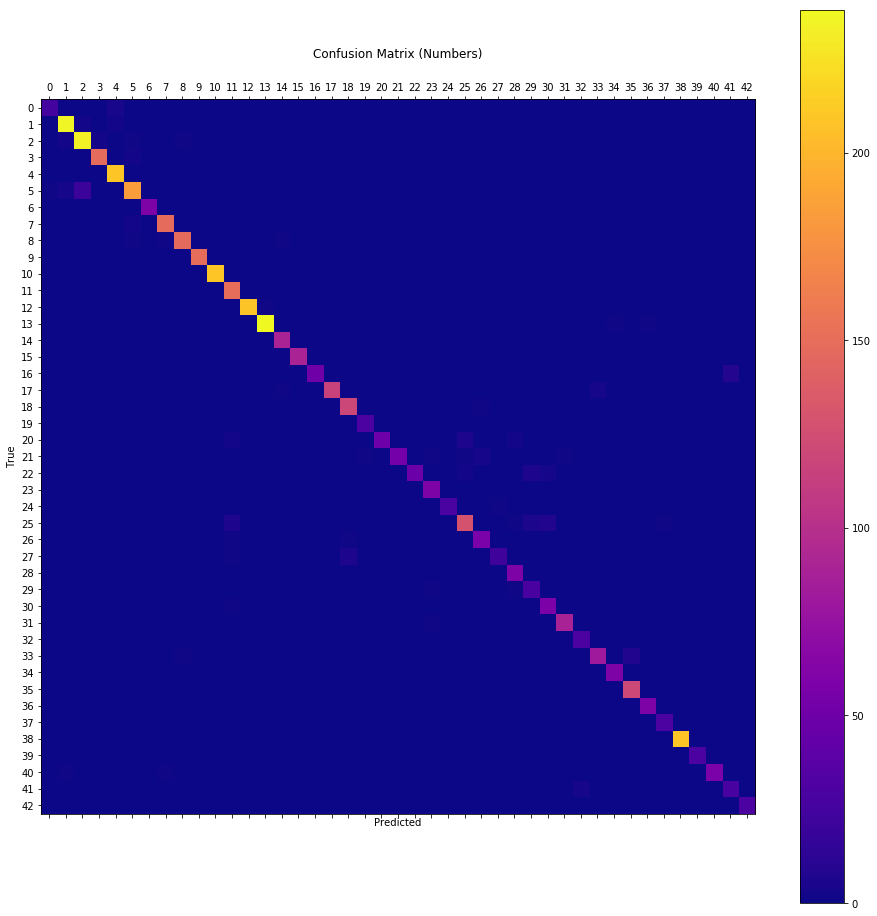

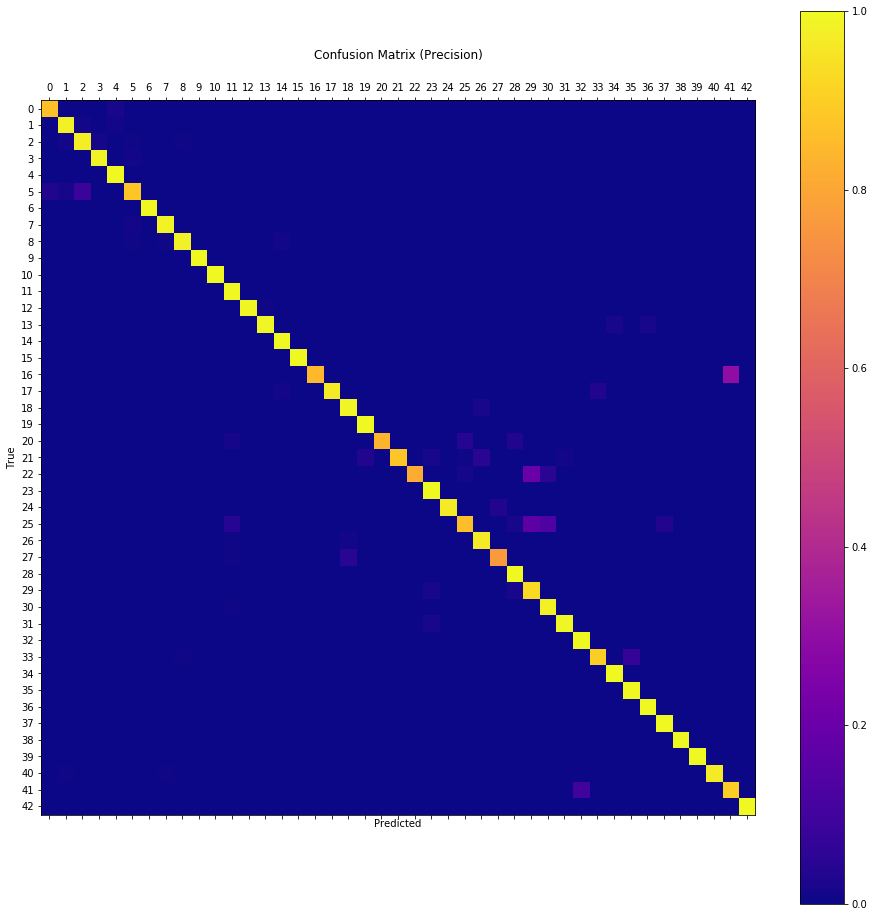

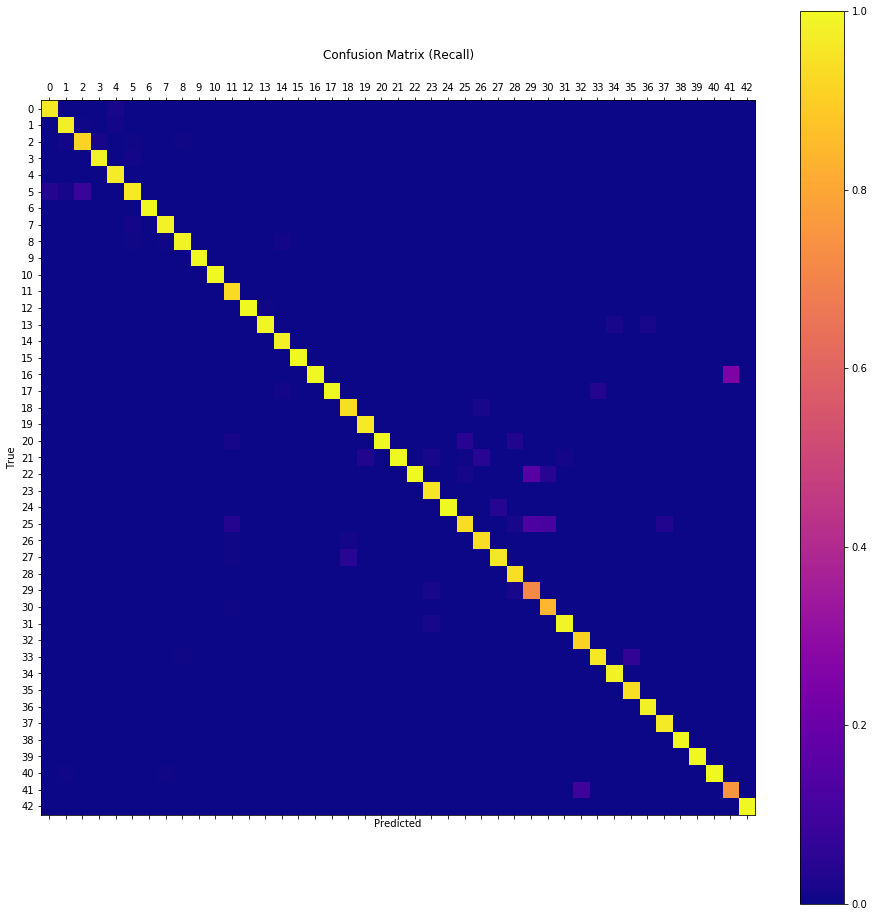

Metrics for test
Precision 0.921776605689
Recall 0.933149713654
f1_score 0.924613512108
accuracy_score 0.947901821061

BY CLASS
Speed limit (20km/h)
Precision : 0.764705882353 ; Recall : 0.866666666667 ; f1_score : 0.8125
Speed limit (30km/h)
Precision : 0.952956989247 ; Recall : 0.984722222222 ; f1_score : 0.968579234973
Speed limit (50km/h)
Precision : 0.957783641161 ; Recall : 0.968 ; f1_score : 0.962864721485
Speed limit (60km/h)
Precision : 0.887525562372 ; Recall : 0.964444444444 ; f1_score : 0.924387646432
Speed limit (70km/h)
Precision : 0.961597542243 ; Recall : 0.948484848485 ; f1_score : 0.954996186117
Speed limit (80km/h)
Precision : 0.903125 ; Recall : 0.91746031746 ; f1_score : 0.910236220472
End of speed limit (80km/h)
Precision : 0.992424242424 ; Recall : 0.873333333333 ; f1_score : 0.929078014184
Speed limit (100km/h)
Precision : 0.992146596859 ; Recall : 0.842222222222 ; f1_score : 0.911057692308
Speed limit (120km/h)
Precision : 0.910973084886 ; Recall : 0.9777777777

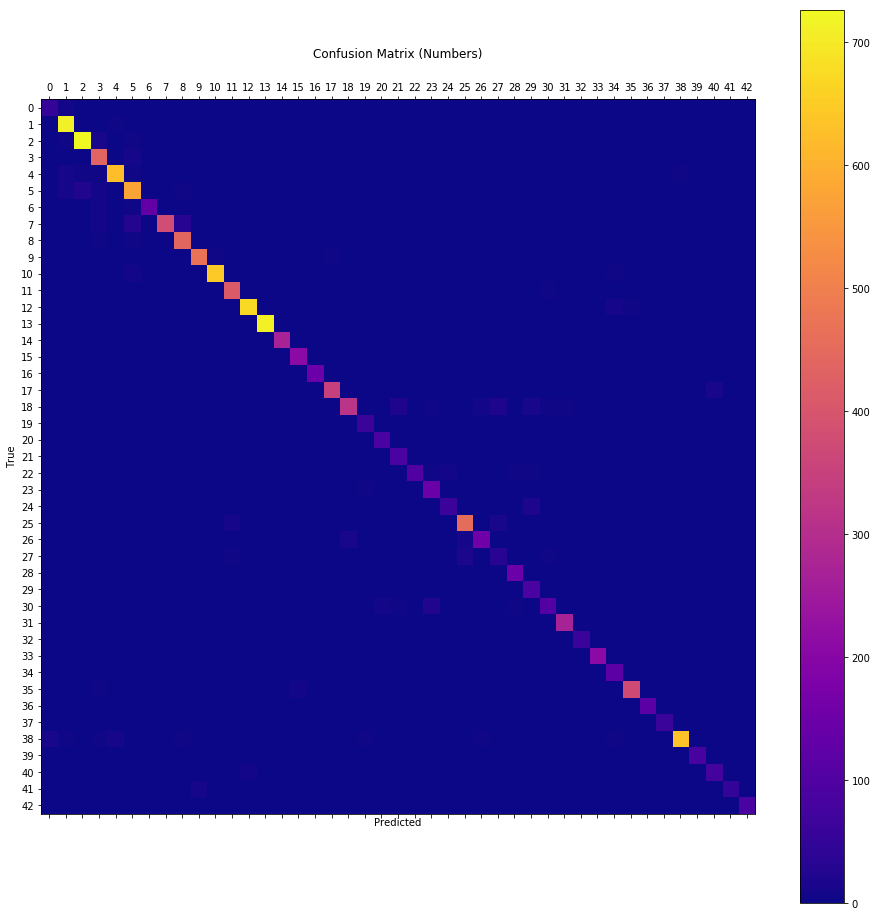

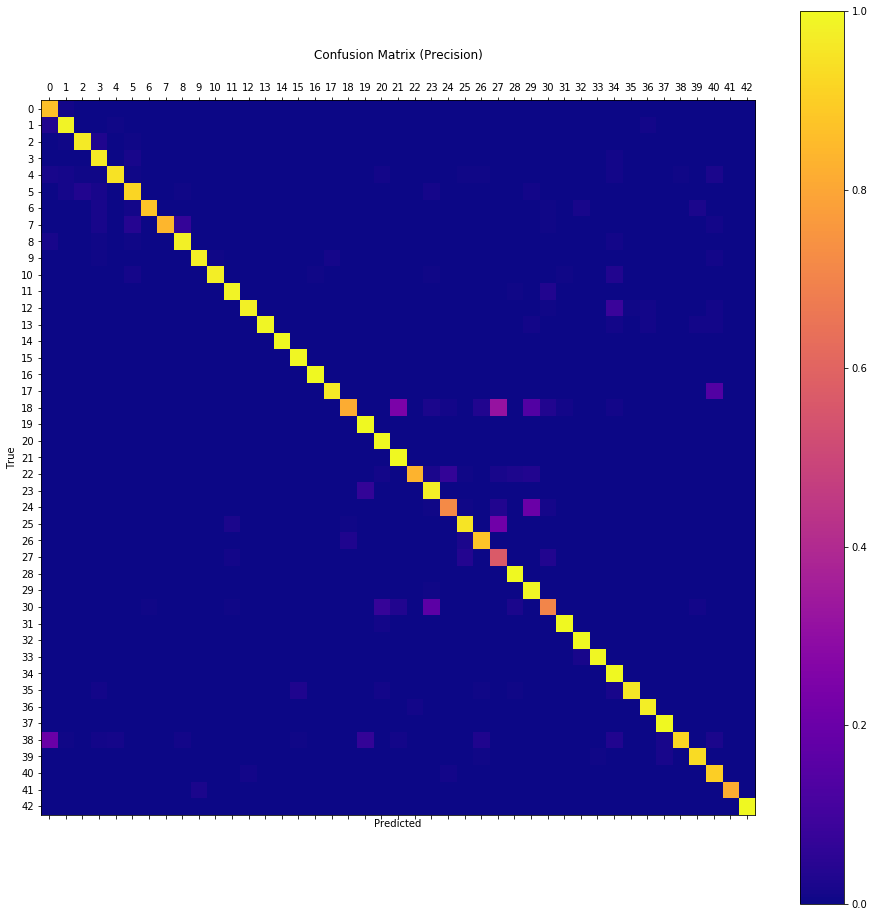

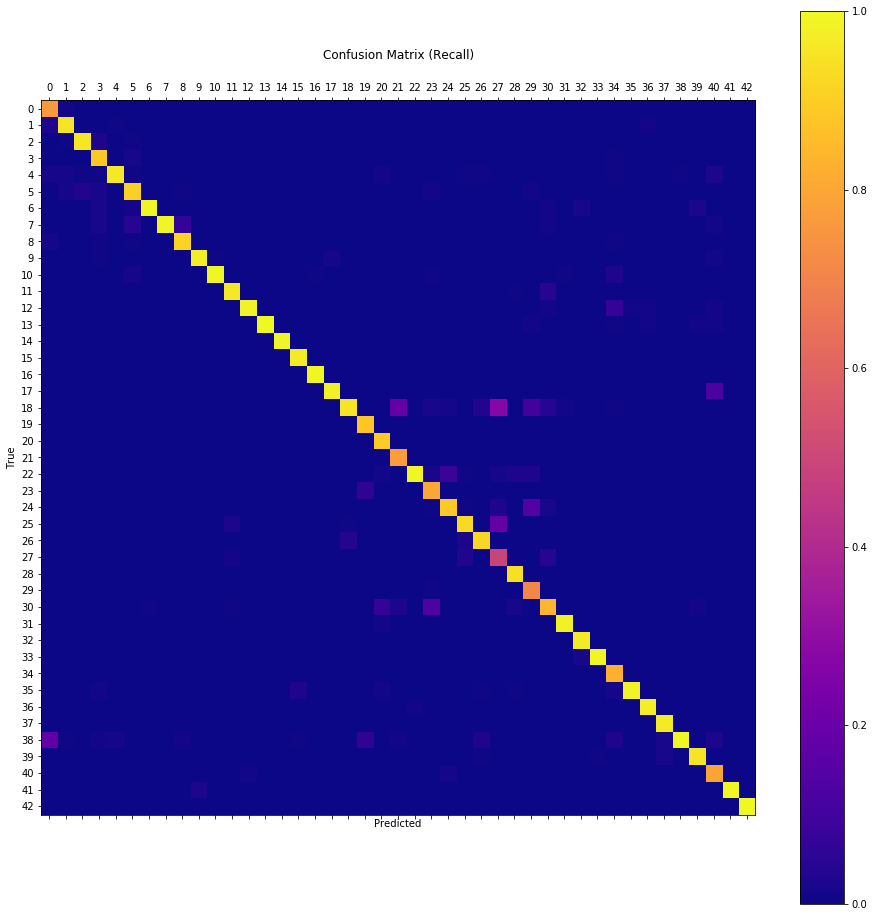

In [54]:
#print("Metrics for training")     
#print_metrics(X_train, y_train, False)
print("Metrics for validation")  
print_metrics(X_valid, y_valid)
print("Metrics for test")  
print_metrics(X_test, y_test)

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

Number of images : 5


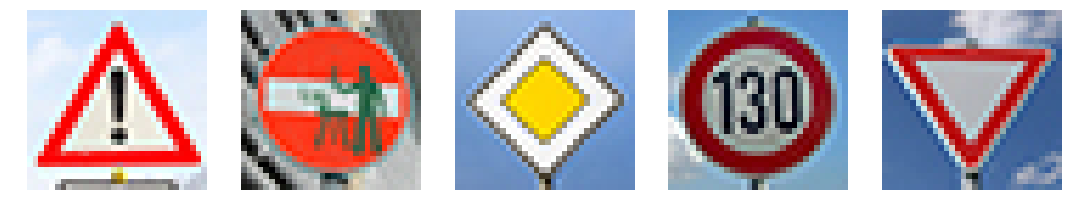

In [79]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
#import cv2
import matplotlib.image as mpimg
import glob
import os.path

#img_size = 32
#num_channels = 3

number_of_images = 15

def load_image(filename) :
    img = mpimg.imread(filename)
    return img

def index_of_sign(sign):
    return signnames.index(sign)

images = []
labels_names = []
labels = []
for i, img in enumerate(glob.glob('test_images/selected/*.jpg')):
    if i < number_of_images:
        image = load_image(img)
        images.append(image)
        #label_name = os.path.basename(img)[0:-len("_32.jpg")]
        #label_name = label_name.replace(":", "/")
        #print(label_name)
        #labels_names.append(label_name)
        #labels.append(index_of_sign(label_name))
    else :
        break

images = np.array(images)
#labels = np.array(labels)

number_of_images = len(images)

print('Number of images : ' + str(len(images)))
print_some_images(images, number_shown = number_of_images)

### Predict the Sign Type for Each Image

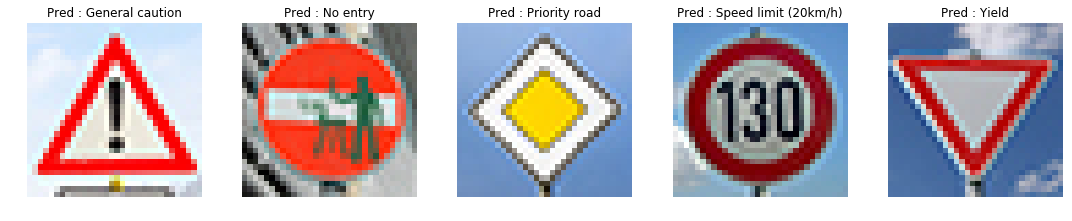

In [80]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

#test_no_entry = tf.reshape(test_no_entry, [-1, test_no_entry.shape[0], test_no_entry.shape[1], test_no_entry.shape[2]])
#print(test_no_entry.shape)
#img = test_no_entry.reshape((-1, test_no_entry.shape[0], test_no_entry.shape[1], test_no_entry.shape[2]))
#img = grayscale(img)
#img = normalize(img)

#images_to_process = grayscale(np.array(images))
#images_to_process = normalize(images_to_process)

images_to_process = pre_processing(images)

#y_ = tf.one_hot(ind, n_classes)

#with tf.Session() as sess:
#    v = sess.run(y_)    
#    print(v)
    
#y__reshaped = tf.reshape(y_, [1, 43])

y_mine = tf.nn.softmax(logits)
y_pred_mine = tf.argmax(y_mine, dimension=1)

def sample_prediction(test_im, test_y):
    feed_dict_mine = {
        x: test_im, 
        keep_prob : 1
    }
    
    test_pred = sess.run(y_pred_mine, feed_dict=feed_dict_mine)
    return test_pred

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    pred = sample_prediction(images_to_process, labels)
    signnames_array = np.array(signnames)
    #print('\n'.join(signnames_array[pred]))
    print_some_images(images, pred_list = pred, number_shown = number_of_images) # (images, labels_list = labels, pred_list = pred, number_shown = 10)
    

### Analyze Performance

In [68]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    my_accuracy = evaluate(images_to_process, labels)
    print("My images Accuracy = {:.3f}".format(my_accuracy))

evaluate


InvalidArgumentError: Incompatible shapes: [14] vs. [0]
	 [[Node: Equal_1 = Equal[T=DT_INT64, _device="/job:localhost/replica:0/task:0/cpu:0"](ArgMax_2, ArgMax_3)]]

Caused by op 'Equal_1', defined at:
  File "/Users/iraadit/miniconda3/envs/carnd-term1/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/iraadit/miniconda3/envs/carnd-term1/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/iraadit/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/iraadit/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/iraadit/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/Users/iraadit/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/Users/iraadit/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/Users/iraadit/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/iraadit/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Users/iraadit/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/iraadit/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Users/iraadit/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/iraadit/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/iraadit/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/iraadit/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/Users/iraadit/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/iraadit/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/iraadit/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/iraadit/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/iraadit/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-47-5e1a31a4f3e6>", line 1, in <module>
    correct_prediction_operation = tf.equal(tf.argmax(logits, 1), tf.argmax(y_, 1)) # = true positives + true negative
  File "/Users/iraadit/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/ops/gen_math_ops.py", line 728, in equal
    result = _op_def_lib.apply_op("Equal", x=x, y=y, name=name)
  File "/Users/iraadit/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 759, in apply_op
    op_def=op_def)
  File "/Users/iraadit/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2240, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/Users/iraadit/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1128, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): Incompatible shapes: [14] vs. [0]
	 [[Node: Equal_1 = Equal[T=DT_INT64, _device="/job:localhost/replica:0/task:0/cpu:0"](ArgMax_2, ArgMax_3)]]


#### Metrics

In [ ]:
print_metrics(images_to_process, labels, by_class = False)

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

Image 1, Top 1 prediction: General caution, certainty: 1.0000000000
Image 1, Top 2 prediction: Speed limit (20km/h), certainty: 0.0000000000
Image 1, Top 3 prediction: Speed limit (30km/h), certainty: 0.0000000000
Image 1, Top 4 prediction: Speed limit (50km/h), certainty: 0.0000000000
Image 1, Top 5 prediction: Speed limit (60km/h), certainty: 0.0000000000

Image 2, Top 1 prediction: No entry, certainty: 0.8396092057
Image 2, Top 2 prediction: Keep right, certainty: 0.1053350940
Image 2, Top 3 prediction: Turn left ahead, certainty: 0.0371371917
Image 2, Top 4 prediction: Go straight or left, certainty: 0.0170528404
Image 2, Top 5 prediction: Speed limit (20km/h), certainty: 0.0004862924

Image 3, Top 1 prediction: Priority road, certainty: 1.0000000000
Image 3, Top 2 prediction: Roundabout mandatory, certainty: 0.0000000000
Image 3, Top 3 prediction: Speed limit (120km/h), certainty: 0.0000000000
Image 3, Top 4 prediction: Ahead only, certainty: 0.0000000000
Image 3, Top 5 prediction

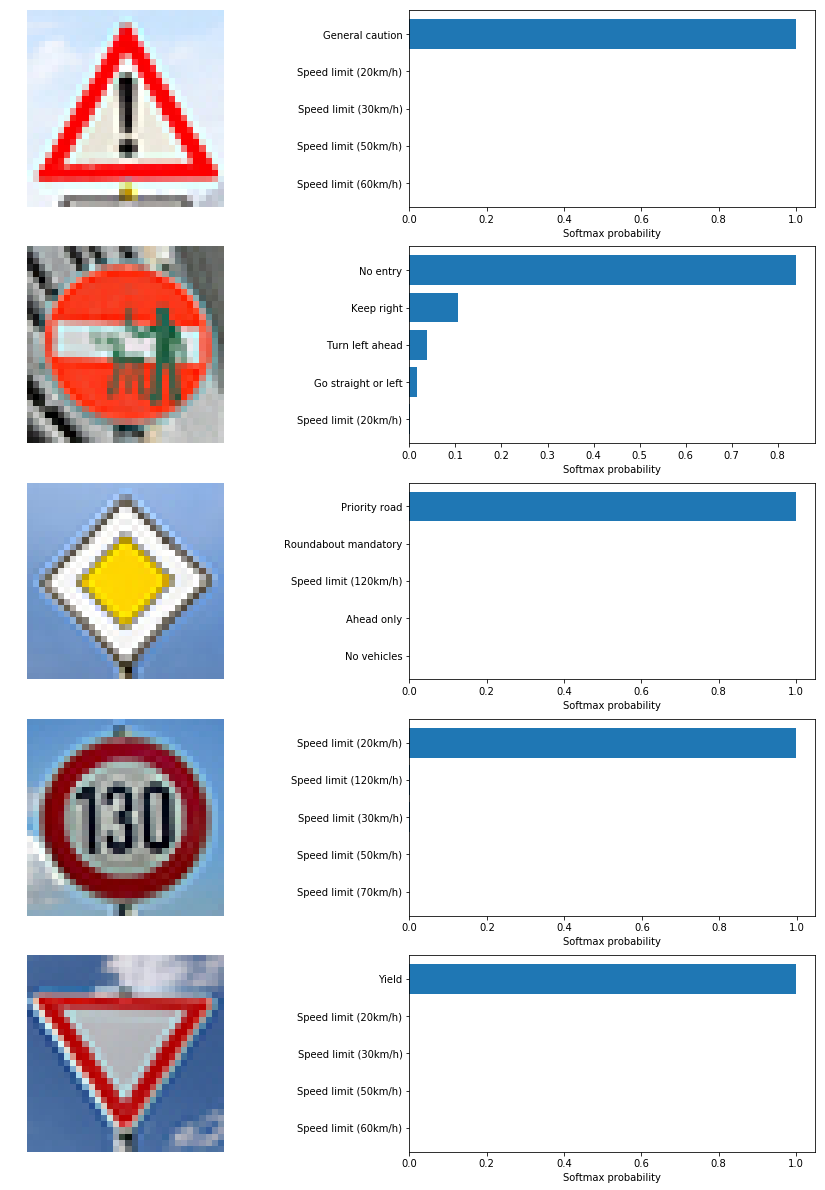

In [81]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

top_5 = tf.nn.top_k(y_mine, k=5)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    feed_dict_mine = {
        x: images_to_process,
        y: labels, 
        keep_prob : 1
    }
    my_top_5 = sess.run(top_5, feed_dict = feed_dict_mine) 
    
    for i in range(number_of_images):#range(len(images_to_process)):
        for j in range(5):
            print('Image %d, Top %d prediction: %s, certainty: %.10f' % (i+1, j+1, signnames_array[my_top_5[1][i][j]], my_top_5[0][i][j]))
        print()
    
    fig, axs = plt.subplots(number_of_images,2, figsize=(16, 21))
    
    for i in range(number_of_images):
        axs[i][0].axis('off')
        axs[i][0].imshow(images[i])

        axs[i][1].barh(5-np.arange(5), my_top_5[0][i]) 
        axs[i][1].set_yticks(5-np.arange(5))
        axs[i][1].set_yticklabels(signnames_array[my_top_5[1][i]][::1])
        axs[i][1].set_xlabel('Softmax probability')

    plt.show()

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")